In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("E:\\codsoft\\IRIS.csv")

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [57]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
df.shape

(150, 5)

In [60]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [61]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [62]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

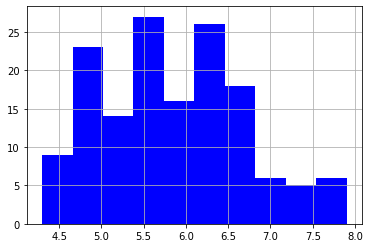

In [63]:
df['sepal_length'].hist(color='b')

<AxesSubplot:>

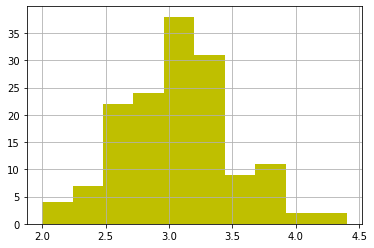

In [64]:
df['sepal_width'].hist(color='y')

<AxesSubplot:>

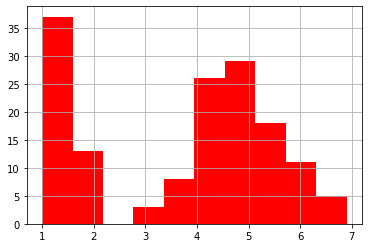

In [65]:
df['petal_length'].hist(color='r')

<AxesSubplot:>

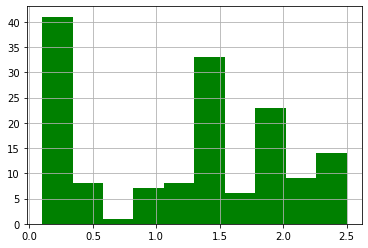

In [66]:
df['petal_width'].hist(color='g')

<AxesSubplot:>

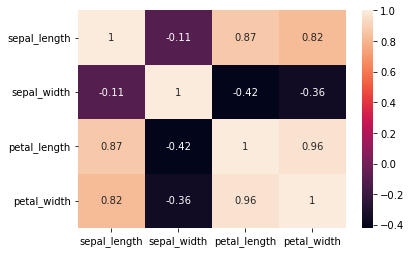

In [67]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
l=LabelEncoder()
df['species']=l.fit_transform(df['species'])

In [70]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


K-NeighborsClassifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [72]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [74]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [75]:
predict=knn.predict(x_test)
print(predict)

[0 1 0 2 2 2 0 2 0 2 2 1 0 2 1 0 1 1 2 0 2 2 0 2 0 1 1 1 2 0 0 0 1 2 2 2 1
 1]


In [76]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score


In [77]:
conf_metrix=confusion_matrix(y_test,predict)
print("confusion metrix\n")
print(conf_metrix)

confusion metrix

[[12  0  0]
 [ 0 11  0]
 [ 0  0 15]]


In [78]:
acc=round(accuracy_score(y_test,predict)*100,2)
prec=round(precision_score(y_test,predict,average="macro")*100,2)
recall=round(recall_score(y_test,predict,average="macro")*100,2)
f=round(f1_score(y_test,predict,average="macro")*100,2)

print("accuracy matrix: ",acc)
print("precision matrix: ",prec)
print("recall matrix: ",recall)
print("f1 score: ",f)

accuracy matrix:  100.0
precision matrix:  100.0
recall matrix:  100.0
f1 score:  100.0


Dicision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

predict=knn.predict(x_test)
print(predict)

[1 0 1 1 2 2 2 1 2 1 0 0 2 2 1 0 0 1 1 2 0 2 1 0 2 0 1 0 2 1 0 2 2 2 0 2 1
 0 0 2 2 0 1 0 0]


In [82]:
conf_metrix=confusion_matrix(y_test,predict)
print("confusion metrix\n")
print(conf_metrix)

confusion metrix

[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]


In [83]:
acc=round(accuracy_score(y_test,predict)*100,2)
prec=round(precision_score(y_test,predict,average="macro")*100,2)
recall=round(recall_score(y_test,predict,average="macro")*100,2)
f=round(f1_score(y_test,predict,average="macro")*100,2)

print("accuracy matrix: ",acc)
print("precision matrix: ",prec)
print("recall matrix: ",recall)
print("f1 score: ",f)

accuracy matrix:  97.78
precision matrix:  97.92
recall matrix:  97.62
f1 score:  97.69


Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

predict=knn.predict(x_test)
print(predict)

[1 2 0 1 0 0 0 1 0 0 2 2 2 0 2 1 0 1 1 1 1 0 1 1 2 1 1 0 2 0 2 1 1 1 2 1 1
 2]


In [87]:
conf_metrix=confusion_matrix(y_test,predict)
print("confusion metrix\n")
print(conf_metrix)

confusion metrix

[[11  0  0]
 [ 0 15  1]
 [ 0  2  9]]


In [88]:
acc=round(accuracy_score(y_test,predict)*100,2)
prec=round(precision_score(y_test,predict,average="macro")*100,2)
recall=round(recall_score(y_test,predict,average="macro")*100,2)
f=round(f1_score(y_test,predict,average="macro")*100,2)

print("accuracy matrix: ",acc)
print("precision matrix: ",prec)
print("recall matrix: ",recall)
print("f1 score: ",f)

accuracy matrix:  92.11
precision matrix:  92.75
recall matrix:  91.86
f1 score:  92.21
